# Dataset : Credit Card Fraud

#### The datasets contains transactions made by credit cards in September 2013 by European cardholders with 284,807 transactions occurred in two days. It is highly unbalanced, the positive class(ie. frauds) account for 492 cases , roughly 0.172% of all transactions.

### 1. Load Libraries : 

In [80]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
import itertools

style.use('ggplot')
np.random.seed(42) 

### 2. Load Dataset :

In [81]:
dataset = pd.read_csv('creditcard.csv')#.drop('Time', axis=1)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [82]:
# taking log transforamtion since some featues are zero. so, first add one to log of zero
dataset['Amount'] = np.log(dataset['Amount'] + 1)
dataset['Time'] = np.log(dataset['Time'] + 1)

In [83]:
# Class 0 -> normal and class 1 -> fraud
normal = dataset[dataset['Class'] == 0]
anomaly = dataset[dataset['Class'] == 1]

print("Normal Shape:",normal.shape)
print("Anomaly Shape:",anomaly.shape)

Normal Shape: (284315, 31)
Anomaly Shape: (492, 31)



### 3. Pre-processing :

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyed from a kernel by joparga3 https://www.kaggle.com/joparga3/kernels
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### 4. Train-Test Split :

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train, normal_test, _, _ = train_test_split(normal, normal, test_size=.2, random_state=42)

In [87]:
print("shape of train right now after split of normal data:",train.shape)
print("shape of test right now after split of normal data:",normal_test.shape)

shape of train right now after split of normal data: (227452, 31)
shape of test right now after split of normal data: (56863, 31)


In [88]:
normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)

In [89]:
print("shape of valid right now after split of remaining normal data:",normal_valid.shape)
print("shape of test right now after split of remaining normal data:",normal_test.shape)

shape of valid right now after split of remaining normal data: (28431, 31)
shape of test right now after split of remaining normal data: (28432, 31)


In [90]:
abnormal_valid, abnormal_test, _, _ = train_test_split(anomaly, anomaly, test_size=.5, random_state=42)

In [91]:
print("shape of valid data after split of abnormnal data:",abnormal_valid.shape)
print("shape of test data after split of abnormal data:",abnormal_test.shape)

shape of valid data after split of abnormnal data: (246, 31)
shape of test data after split of abnormal data: (246, 31)


#### 100% of train is composed of 50% of normal dataset
#### 100%of test is composed from 25% of remaining normal dataset plus 50% of abnormal dataset
#### 100% of validation composed of 25% of remaining normal dataset plus 50% of remaining abnormal dataset

In [92]:
train = train.reset_index(drop=True)
valid = normal_valid.append(abnormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(abnormal_test).sample(frac=1).reset_index(drop=True)

In [93]:
print('Train shape: ', train.shape)

Train shape:  (227452, 31)


In [94]:
print('Test shape:, ', test.shape)

Test shape:,  (28678, 31)


In [95]:
print('Valid shape: ', valid.shape)

Valid shape:  (28677, 31)


# MODELLING --

## 1. Gaussain Based Model :

In [96]:
from scipy.stats import multivariate_normal

## model :
mu = train.drop('Class', axis=1).mean(axis=0).values
sigma = train.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)
#model
print(np.median(model.logpdf(valid[valid['Class'] == 0].drop('Class', axis=1).values))) 
print(np.median(model.logpdf(valid[valid['Class'] == 1].drop('Class', axis=1).values))) 

-32.819088288714404
-661.9006173762141


In [97]:
tresholds = np.linspace(-1000,-10, 150)
scores = []

for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('Class', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())   #samples outside this ellipsis will be considered anomalous transactions.

0.749395648670427 110


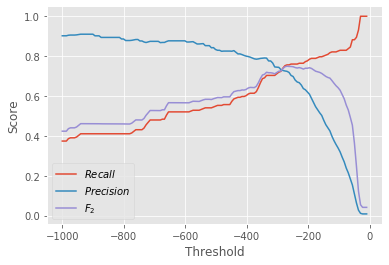

In [98]:
# Precision, Recall and (F_2 )-score as a function of the threshold:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -269
Test Recall Score: 0.793
Test Precision Score: 0.701
Test F2 Score: 0.773


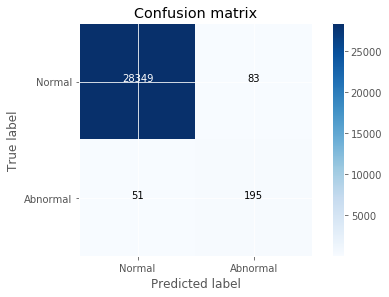

In [99]:
#  test recall, precision and (F_2)-score along with the confusion matrix:

final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Abnormal'], title='Confusion matrix')

##### Analysis : only 17% of the anomalies were not detected and of the ones predicted as anomalies, only 42% were false positives

## 2. Histogram Based Model :

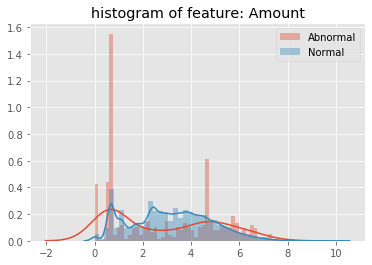

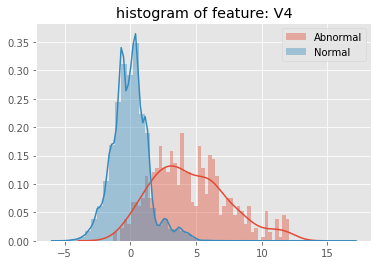

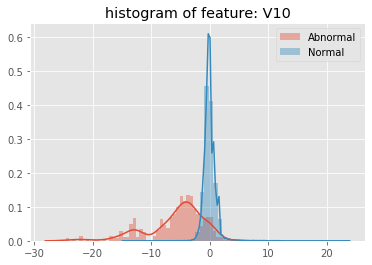

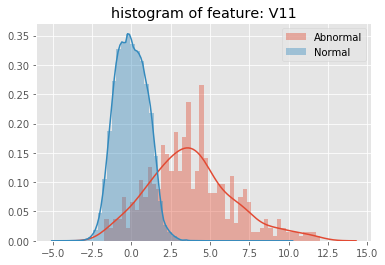

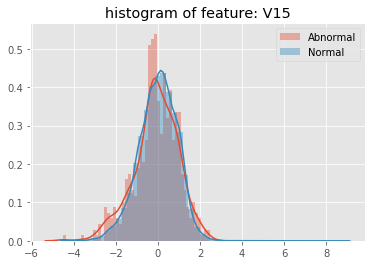

In [100]:
import matplotlib.gridspec as gridspec

# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in ['Amount', 'V4', 'V10', 'V11', 'V15']:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.Class == 1], bins=50, label='Abnormal')   ## Abnromal Dataset
    sns.distplot(dataset[feature][dataset.Class == 0], bins=50, label='Normal')    ## Normal Dataset
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

In [101]:
# model one histogram per feature in the normal training data
# Also, check which bin a data instance fall in
# Then, combine the hight of these bins to produce a final score for the data instance
# So, If the score is to low, it means data falls in bins where there is little or no normal data--

class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        bin_hight, bin_edge = [], []
        for var in X.T: # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)
   
    def predict(self, X):   
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):  # find wich bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin()-1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght           
            scores.append(np.mean(obs_score))        
        return np.array(scores)
        
model = hist_model()
model.fit(train.drop('Class', axis=1).values)
print(np.median(model.predict(valid[valid['Class'] == 0].drop('Class', axis=1).values))) 
print(np.median(model.predict(valid[valid['Class'] == 1].drop('Class', axis=1).values))) 

67667.86666666667
30645.86666666667


In [102]:
# Use validation set to determine a threshold for the score
# Moreover, now we have number of bins as an hyper-parameter, which requires tuning-

tresholds = np.linspace(10000, 80000, 100)
scores = []
y_pred_score = model.predict(valid.drop('Class', axis=1).values)
for treshold in tresholds:
    y_hat = (y_pred_score < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)

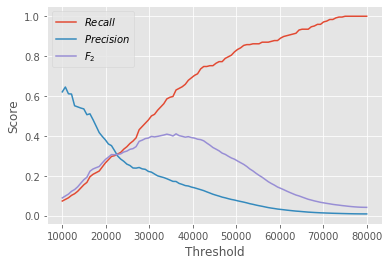

In [103]:
#  plot the recall, precision and ( F_2 ) scores as a function of the threshold-

plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: 36161
Test Recall Score: 0.646
Test Precision Score: 0.170
Test F2 Score: 0.415


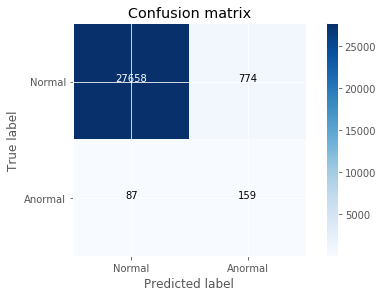

In [104]:
# pick the threshold with the best validation (F)-score and produce a final evaluation on the test set -

final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.predict(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

#### Analysis : It overcame the limitation of representation. But, it does not capture any relations between variables.

## 3. Cluster Based Model -

#### Clustering is basically grouping similar data together that assumes "Normal data instances lie close to their closest cluster centroid, while anomalies are far away from their closest cluster centroid".

In [105]:
# Implementing EM algorithm to cluster the data into (n) Gaussian :

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(train.drop('Class', axis=1).values)
print(gmm.score(valid[valid['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(valid[valid['Class'] == 1].drop('Class', axis=1).values))

11.201163735605128
-229.55029695531326


In [106]:
# using the validation set, we tune a threshold that will be used to classify data as normal or anomalous-

tresholds = np.linspace(-400, 0, 100)
y_scores = gmm.score_samples(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.7585385226370135 80


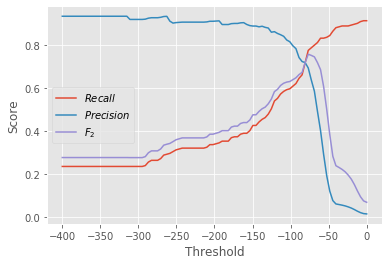

In [107]:
# plot the recall, precision and ( F_2 ) scores as a function of the threshold-
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -76.767677
Test Recall Score: 0.793
Test Precision Score: 0.646
Test F2 Score: 0.758


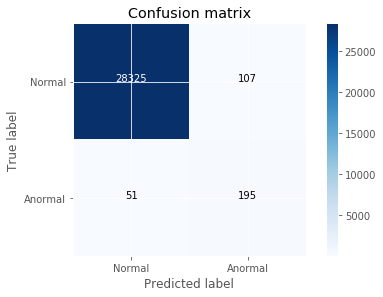

In [108]:
# with the trained and tuned model, we produce a final evaluation on the test set-

final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (gmm.score_samples(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

#### Analysis : Major Drawbacks are that it detects anomalies as a by-product of clustering and are not optimized for anomaly detection and the computational complexity are often bottlenecks for large datasets.

## 4. Isolation Tree Based Model

#### A feature-wise selectoin process, which 'isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature

In [109]:
from sklearn.ensemble import IsolationForest
np.random.seed(42)

# model: ## fitting 50 isolation tree to make a isolation forest
model = IsolationForest(random_state=42, n_jobs=4, max_samples=train.shape[0], bootstrap=True, n_estimators=50)
model.fit(train.drop('Class', axis=1).values)
print(model.decision_function(valid[valid['Class'] == 0].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class'] == 1].drop('Class', axis=1).values).mean())

0.1504765897359984
-0.05375843425837896


In [110]:
# using validation set to tune the threshold:
tresholds = np.linspace(-.2, .2, 200)
y_scores = model.decision_function(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.6796116504854369 121


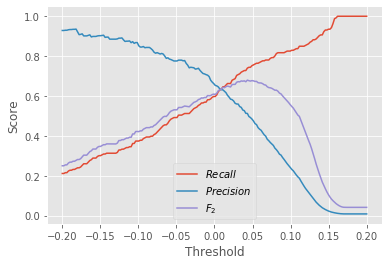

In [111]:
# plotting precision, recall and F2 score:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: 0.043216
Test Recall Score: 0.748
Test Precision Score: 0.500
Test F2 Score: 0.680


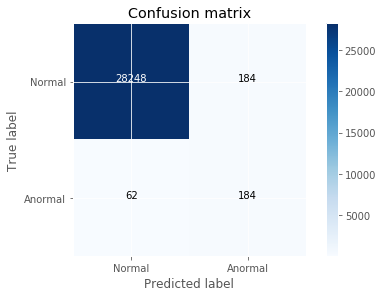

In [112]:
# using optimal threshold to create final test call:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.decision_function(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

#### Analysis : It is better than most of the approaches but couldn't beat our Cluster Based Model